Name - Shadeeb Hossain

#Installing and Loading images for  Rotten Food

In [ ]:
! pip install flickrapi

**Installing the relevant packages**

In [ ]:
# Installing the libraries and package
import flickrapi
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.transform
import requests
from io import BytesIO
%matplotlib inline


**Using API 'key' and 'secret' to access FlickrAPI**

In [ ]:
# Accessing FlickAPI
api_key = u'xxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
api_secret = u'xxxxxxxxxxxxxx'
flickr = flickrapi.FlickrAPI(api_key, api_secret)

**Creating a Directory for images with rotten food **

In [ ]:
# Loading the images for "Rotten vegetables"
keyword = 'rotten food'
dir_name = 'rotten'
photos = flickr.walk(text=keyword, tag_mode='all', tags=keyword,extras='url_c',\
                     sort='relevance',per_page=100)

In [ ]:
# Creating the directories for "Rotten Vegetables"
import os
dir_exists = os.path.isdir(dir_name)
if not dir_exists:
    os.mkdir(dir_name)
    print("Making directory %s" % dir_name)
else:
    print("Will store images in directory %s" % dir_name)

Will store images in directory rotten


In [ ]:
# Displaying the image for rotten vegetables

def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')
    else:
        # Color image.
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)

    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

**Saving the files from FlickrAPI into the relevant Directory**

In [ ]:
# Import warnings and saving the files for "Rotten Vegetables"
import warnings

nimage = 30
i = 0
nrow = 224
ncol = 224
for photo in photos:
    url=photo.get('url_c')
    if not (url is None):

        # Create a file from the URL
        # This may only work in Python3
        response = requests.get(url)
        file = BytesIO(response.content)

        # Read image from file
        im = skimage.io.imread(file)

        # Resize images
        im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant')

        # Convert to uint8, suppress the warning about the precision loss
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            im2 = skimage.img_as_ubyte(im1)

        # Save the image
        local_name = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_name,keyword, i)
        skimage.io.imsave(local_name, im2)
        print(local_name)
        i = i + 1
    if (i >= nimage):
        break



rotten/rotten food_0000.jpg
rotten/rotten food_0001.jpg
rotten/rotten food_0002.jpg
rotten/rotten food_0003.jpg
rotten/rotten food_0004.jpg
rotten/rotten food_0005.jpg
rotten/rotten food_0006.jpg
rotten/rotten food_0007.jpg
rotten/rotten food_0008.jpg
rotten/rotten food_0009.jpg


**Dispalying those Rotten Food images**

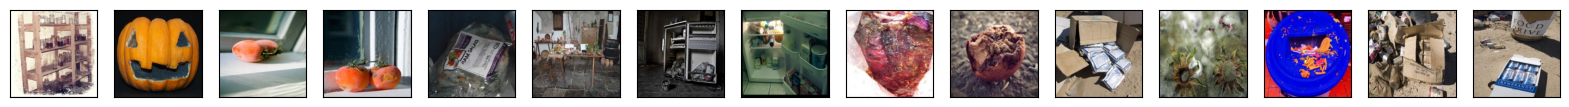

In [ ]:
plt.figure(figsize=(20,20))
nplot = 15
for i in range(nplot):
    fn = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_name,keyword, i)
    im = skimage.io.imread(fn)
    plt.subplot(1,nplot,i+1)
    disp_image(im)